# Исследование компьютерных игр

**Содержание** 
<a id=0> </a>

[Введение](#1)  
[Предобработка данных](#2)  
[Исследование данных](#3)   
[Портреты пользователей](#4)  
[Проверка гипотез](#5)  
[Вывод](#6)

## Введение
<a id=1> </a>

Наш интернет-магазин занимается продажей компьютерных игр по всему миру. В данном исследовании мы будем работать с выборкой компьютерных игр на разных платформах с 1980 по 2016 годы. Данные собраны из открытых источников: доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Наш магазин планирует кампанию на 2017-й. Нужно выявить закономерности и отработать принцип работы с данными, который будет так же актуален и для последующих лет.

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import datetime
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st 

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv') # откроем датасет
except FileNotFoundError:
    data = pd.read_csv('/Users/09e6y/Desktop/Катькис/Практикум/Проект 5 games/games.csv')
display(data)
data.info() # посмотрим на данные

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


[Содержание](#0)

## Поиск ошибок и предобработка данных
<a id=2> </a>

1. Нас не устраивают названия колонок - нужно привести их к более стандартному и общепринятому виду.
0. Есть пропуски, часть из которых можно и нужно обработать.
0. Год заменим на цельночисленное значение.
0. Проверим наличие дубликатов.
0. Посмотрим на колонку с возрастным рейтингом.


In [3]:
# поменяем названия колонок
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.duplicated().sum() # проверим на наличие дубликатов

0

In [5]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

2

In [6]:
data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], inplace=True) # удалим дубликаты
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

0

Посмотрим, что не так с колонкой 'user_score', почему тип данных определяется как object, для этого выведем уникальные значения.

In [7]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Из-за того что в данные, записанные в колонке 'user_score' вкралась запись 'tbd' тип данных в ней определяется как object. Эта запись означает 'to be decided' - стандартное в мире компьютерных игр обозначение пропусков в данных, которые появятся в будущем. Поскольку заменить их на 0 или, к примеру, медиану будет не корректным (речь идет о будущем, мы еще не знаем этих данных) - заменим их на привычное обозначение NaN, которое не помешает расчетам, и позже, при необходимости, удалим строки с пропусками. Пока что не хотелось бы избавляться от такого большого количества данных.

In [8]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
# приведем данные к формату float, 'tbd' автоматически заменится на NaN

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [9]:
data.isna().sum() # посчитаем пропуски

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

Пропусков в столбце с названием игры и жанром - всего по 2, можем избавиться от них, не опасаясь искажения данных. Пропусков с годом релиза тоже очень мало - их не корректо будет заменить на среднее или медиану, потому что нет значения колонки, по которой можно было бы сделать такое сравнение, чтобы восстановить данные. 

Отдельно скажем, что предполагаемая причина пропусков, на наш взгляд, кроется в источнике этих данных - они собирались вручную по открытым источникам, поскольку некоторые игры вышли еще в прошлом веке - информацию о них не так-то просто найти.

In [10]:
data = data.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)

In [11]:
data.isna().sum() # посчитаем пропуски снова

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [12]:
data['year_of_release'] = np.int64(data['year_of_release']) # сделаем год числьночисленным значением
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16439,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16441,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски с рейтингом и оценками оставим как есть - заменять их на среднее или медиану не имеет смысла, рейтинг может быть каким угодно, такая замена не будет адекватной. Скорее всего, рейтинг отсутствует у старых игр - в эпоху до интернета и критиков было не так много и печалались рейтинги в специализированных журналах, например, возможно, история их не сохранила или человек, собиравший данные, не смог их найти. Так ли много пропусков в современных данных - можно проверить.

In [13]:
data.query('year_of_release > 2000').isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       6376
user_score         6856
rating             4605
dtype: int64

Наша теория отчасти права - чем новее игра, тем меньше пропусков во всех столбцах. Но даже если отфильтровать по последнему году - пропуски все равно кое-где есть. Возможно не все игры в датасете достаточно популярные, чтобы заслужить внимание.

Посмотрим на колонку с рейтингом ESRB. Это аббревиатура организации, которая занимается определением возростного рейтинга для компьютерных игр. 

In [14]:
data['rating'].unique() # посмотрим на уникальные значения

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

RP означает что рейтинга еще нет - продукт только был отправлен на оценку, но еще не получил ее. Для нас это аналогично значению NaN. Но Nan, который тоже тут есть нам помешает анализировать данные в дальнейшем, поэтому заменим его на unknown.

In [15]:
data['rating'].fillna('unknown', inplace=True)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Добавим колонку с суммарными продажами каждой игры.

In [16]:
# сложим вместе продажи по всем регионам и добавим их в новую колонку 
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16439,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16441,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


Проверим еще один параметр. Нам известно что платформа DS вышла в 2004 году, проверим нет ли ошибок в данных о годе выхода игры или названии платформы.

In [17]:
data.query('platform == "DS" and year_of_release < 2004') # отфильтруем данные

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


Год выхода игры указан не верно. [Здесь](https://www.vgchartz.com/game/4399/strongest-tokyo-university-shogi-ds/) можно посмотреть правильный год - 2010. Заменим его на правильный.

In [18]:
data.loc[15704,'year_of_release'] = 2010

Итак, мы сделали предварительную обработку данных, избавились от пропусков где это возможно, а оставшиеся - не помешают нам провести исследование. К сожалению, появление пропусков неизбежно, когда база данных заполняется по открытым источникам, здесь бывают и ошибки и человеческий фактор и просто невозможность найти какие-то данные вследствие их отдаленности во времени.

[Содержание](#0)

## Исследование данных. Поиск закономерностей
<a id=3> </a>

Для начала посмотрим в какие годы сколько игр выпускалось. Для этого построим гистограмму.

In [19]:
data_year = data.groupby('year_of_release')['name'].count().reset_index()
data_year

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,13
6,1986,21
7,1987,16
8,1988,15
9,1989,17


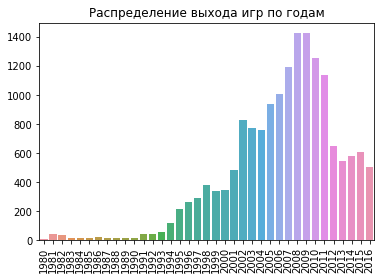

In [20]:
sns.barplot(data=data_year, x='year_of_release', y='name').set_title('Распределение выхода игр по годам')
plt.ylabel('')
plt.xticks(rotation=90)
plt.xlabel('');

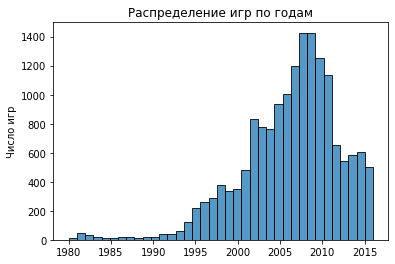

In [49]:
ax = sns.histplot(data=data, x='year_of_release', bins=37)
ax.set_title('Распределение игр по годам')
ax.set_xlabel('')
ax.set_ylabel('Число игр');

Больше всего игр из нашей выборки выходило с 2002 по 2011.

### Топ-10 игровых платформ

Выявим топ платформ по продажам и запишем их в отдельный список, чтобы потом использовать как фильтр.


In [22]:
data_platform = data.groupby('platform')['sum_sales'].sum()

data_platform = data_platform.sort_values(ascending=False).reset_index()
top_10 = data_platform['platform'].head(10) # top-10 платформ по продажам


top_10 # top-10 платформ по продажам


0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
6     PS4
7     GBA
8     PSP
9     3DS
Name: platform, dtype: object

In [23]:
data_top_10 = data[data['platform'].isin(top_10)] # отфильтруем таблицу по названию популярных платформ

data_top_10

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16436,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01
16437,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,unknown,0.00
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16439,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01


### Срок жизни платформ

Посмотрим срок жизни платформ по суммарным продажам игр для них.

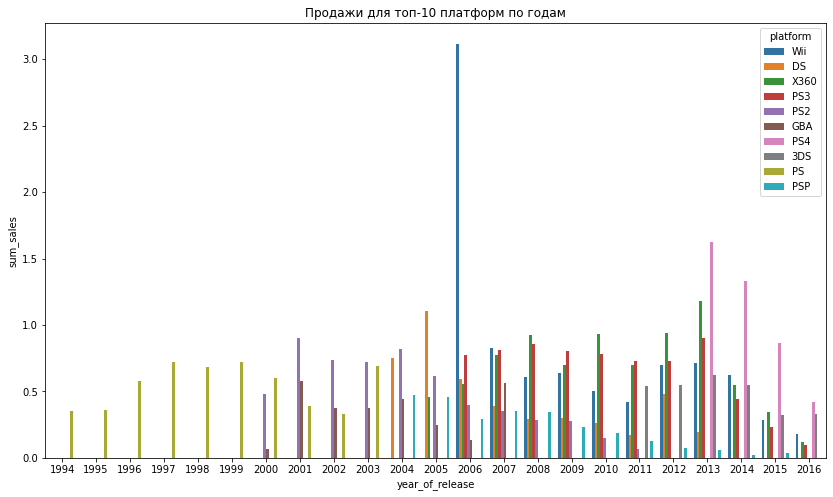

In [24]:
plt.figure(figsize=(14, 8))
sns.barplot(data=data_top_10, x='year_of_release', y='sum_sales', hue='platform', ci=None).set_title('Продажи для топ-10 платформ по годам');

Сделаем срез, чтобы картина была чуть более наглядной.

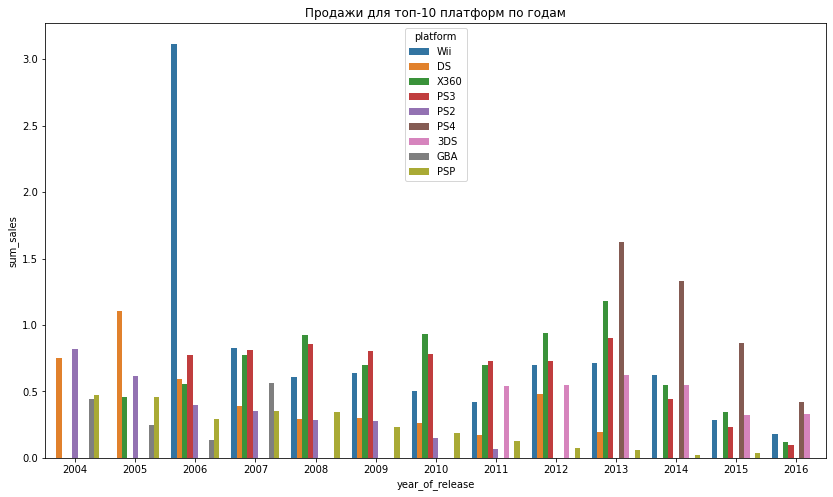

In [25]:
plt.figure(figsize=(14, 8))
sns.barplot(data=data_top_10.query('year_of_release > 2003'), x='year_of_release', y='sum_sales', hue='platform', ci=None).set_title('Продажи для топ-10 платформ по годам');

Для большинства топовых платформ продажи растут первые 1-2 года после выхода, а в течение 7-10 лет после этого происходит снижение продаж. Так же хорошо видно преемственность платфрм - когда выходит новая PlayStation - старая начинает идти на спад, но какое-то время они существуют все вместе, потому что игры для них совместимы с боле старой платформой. Например, в 2013 когда вышла PS4, PS3 еще была вполне актуальной, а вот игры для PS2 уже почти никто не покупал.
А еще видим что самая популярная платформа wii от Nintendo, вышедшая в 2006 побила все рекорды продаж и с ней никто не может сравниться.

Мы заранее отделили современные игры от старых, а если бы мы это не сделали -  сравнивать абсолютные числа продаж было бы не совсем корректно - ясно что рынок игр сейчас сильно больше чем в 80-е. Но мы можем посмотреть на развитие игровой индустрии в более ранний период - попробуем определить жизненный цикл платформ по динамике выпуска игр. Посмотрим на процент игр в год от общего числа игр, выпущенных для этой платформы. Таким образом мы проведем нормализацию данных.

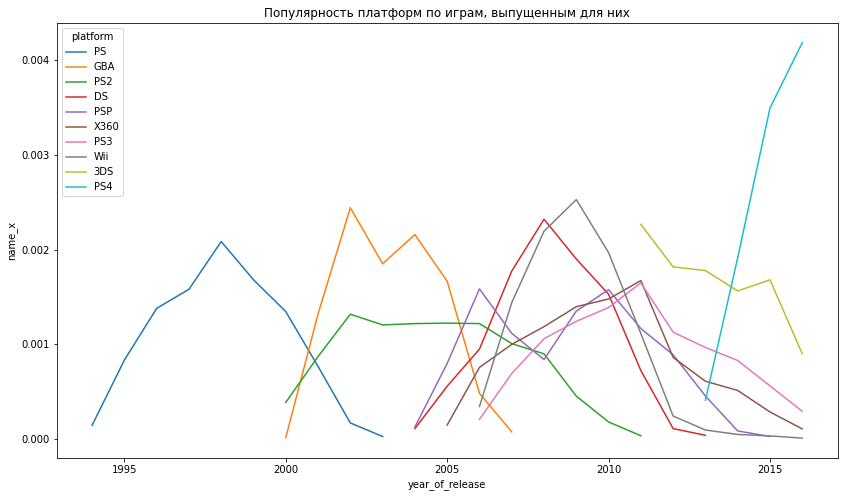

In [26]:
data_year = data_top_10.groupby(['year_of_release', 'platform'])['name'].count().reset_index()

# сгруппируем по году и платформе и посчитаем количество игр на топ-10 платформ, выпущенных в конкретном году
data_sales = data_top_10.groupby(['platform'])['name'].count().reset_index()

# сгруппируем по платформе и посчитаем количество игр, всего выпущенных на конкретной платформе 
data_platform = data_year.merge(data_sales, on='platform') # объединим обе таблицы вместе

data_platform['name_x'] /= data_platform['name_y'] * 100 # посчитаем % игр в конкретный год от общего числа игр, выпущенных для этой платформы
#data_platform
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_platform, x='year_of_release', y='name_x', hue='platform', ci=None).set_title('Популярность платформ по играм, выпущенным для них');


По графику что средний срок жизни платформы - 5-10 лет, после чего игры для нее практически перестают выходить. Но особенно тут можно отметить PS4 - она вышла в 2013 и до 2016 была явно на подъеме, опережая все другие по количеству игр, для нее созданных.

На основе полученных данных актуальным периодом будем считать половину жизни платформы - 3 года. Это время когда любая из топовых платформ и игры для нее будут считаться актуальными. По этим данным можно будет сделать прогноз на будущий год. Исходя из этого - отрежем от наших рассчетов данные по платформам, выпущенным с 2014 по 2016 г. Потенциально мы должны будем увидеть, какие платформы сейчас на подъеме, а какие - уже выходят из оборота. Топ-10 тоже будет другим.

In [27]:
data_new = data.query('year_of_release > 2012') # сделаем срез с 2014 по 2016
data_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16431,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16435,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [28]:
data_top_new = data_new.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).reset_index()
top_10 = data_top_new['platform'].head(10)


data_new = data_new[data_new['platform'].isin(top_10)] # отфильтруем талицу по топ-10 платформ
top_10

0     PS4
1     PS3
2    XOne
3     3DS
4    X360
5    WiiU
6      PC
7     PSV
8     Wii
9     PSP
Name: platform, dtype: object

А теперь построим график уже по новым данным.

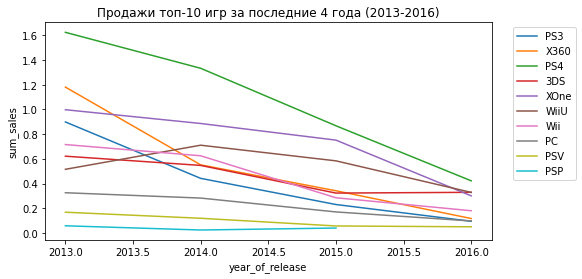

In [29]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=data_new, x='year_of_release', y = 'sum_sales', hue='platform', ci=None).set_title('Продажи топ-10 игр за последние 4 года (2013-2016)');
plt.legend(bbox_to_anchor=(1.2, 1));

Построим boxplot по распределению продаж по нашим платформам.

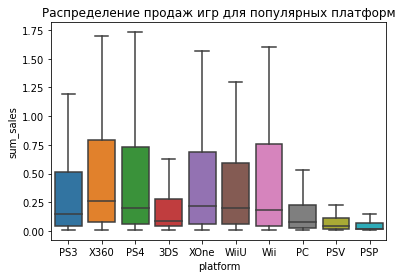

In [30]:
sns.boxplot(x='platform', y='sum_sales', data=data_new, showfliers=False).set_title('Распределение продаж игр для популярных платформ'); # построим  ящик с усами и сразу отсечем выбросы

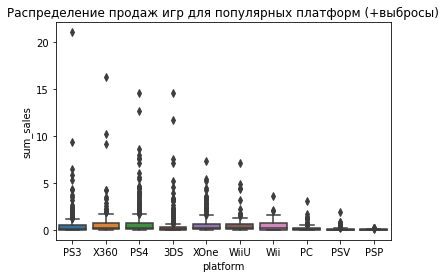

In [31]:
sns.boxplot(x='platform', y='sum_sales', data=data_new).set_title('Распределение продаж игр для популярных платформ (+выбросы)'); # построим  ящик с усами и сразу отсечем выбросы

In [32]:
print('Проанализировав 2 первых графика, выберем как потенциально прибыльные 5 платформ по продажам: ')
data_new.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(5)

Проанализировав 2 первых графика, выберем как потенциально прибыльные 5 платформ по продажам: 


platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
Name: sum_sales, dtype: float64

Если посмотреть на выбросы - получается чем прибыльнее платформа - тем больше у нее выбросов. Можно предположить - что это бесцеллеры, которые делают продажи игр для каждой платформы, а еще, поскольку мы смотрим на сумму продаж, - на выборы могли повлиять продажи игры в конкретном регионе, где конкретная консоль или конкретная игра могли быть популярнее, чем в других.

Построим сводную таблицу, чтобы узнать какая платформа сколько денег принесла.

In [55]:

np.transpose(data_new.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').loc[[2015, 2016]]).sort_values(by = 2015, ascending=False)


year_of_release,2015,2016
platform,,
PS4,118.90,69.25
XOne,60.14,26.15
3DS,27.78,15.14
PS3,16.82,3.60
WiiU,16.35,4.60
X360,11.96,1.52
PC,8.52,5.25
PSV,6.25,4.25
Wii,1.14,0.18


Явные лидеры тут XOne, PS4 и 3DS. Что касается Wii и WiiU, но Wii можно и откинуть. Как видим, продажи там уже почти в нуле. 


Какие выводы можно сделать:
- В лидерах за исследуемый период X360, PS3, PS4 и XboxOne - эти данные не совпадают с данными нашего топа, но выглядят правдоподобно - мы отсекли выбросы и аномальные значения
- Видим что данные по всем платформам скошены вправо - в сторону бОльших значений, это значит что в среднем люди покупают более дорогие игры, но медианный покупатель - ориентирован на более дешевый сегмент.

### Корреляция с оценками критиков и пользователей

Теперь посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Возьмем для примера самую популярную PS4.

0.406567902061781

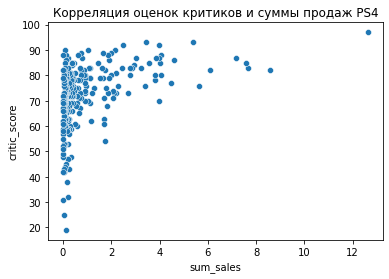

In [34]:
sns.scatterplot(data=data_new.query('platform == "PS4"'), x='sum_sales', y='critic_score').set_title('Корреляция оценок критиков и суммы продаж PS4');
data_new.query('platform == "PS4"')['sum_sales'].corr(data_new.query('platform == "PS4"')['critic_score']) # посмотрим на коэффициент корреляции Пирсона

-0.031957110204556424

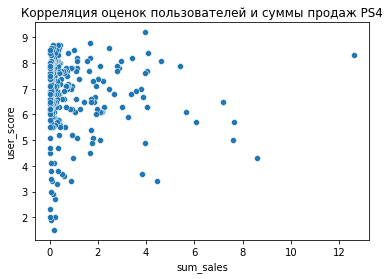

In [35]:
sns.scatterplot(data=data_new.query('platform == "PS4"'), x='sum_sales', y='user_score').set_title('Корреляция оценок пользователей и суммы продаж PS4');
data_new.query('platform == "PS4"')['sum_sales'].corr(data_new.query('platform == "PS4"')['user_score']) # посмотрим на коэффициент корреляции Пирсона

Корреляция продаж с оценками критиков - довольно слабая, а вот на оценки пользователей явно не стот смореть - корреляция слабая и даже в обратную сторону, но нельзя назвать это обратной корреляцией - она слишком ничтожна.


Теперь возьмем менее популярную, но растущую в продажах 3DS.

0.35705661422881035

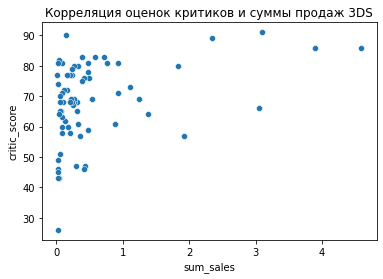

In [36]:
sns.scatterplot(data=data_new.query('platform == "3DS"'), x='sum_sales', y='critic_score').set_title('Корреляция оценок критиков и суммы продаж 3DS');
data_new.query('platform == "3DS"')['sum_sales'].corr(data_new.query('platform == "3DS"')['critic_score']) # посмотрим на коэффициент корреляции Пирсона

0.24150411773563016

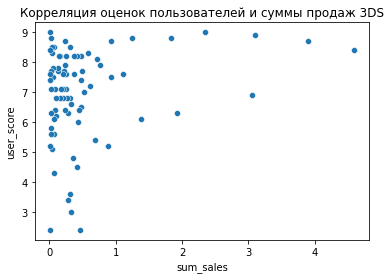

In [37]:
sns.scatterplot(data=data_new.query('platform == "3DS"'), x='sum_sales', y='user_score').set_title('Корреляция оценок пользователей и суммы продаж 3DS');
data_new.query('platform == "3DS"')['sum_sales'].corr(data_new.query('platform == "3DS"')['user_score']) # посмотрим на коэффициент корреляции Пирсона

Сильно меньше данных и еще более слабая корреляция по обеим позициям.

Если оценки критиков еще можно взять для прогнозов, то оценки юзеров - точно не подойдут.

Но может быть с платформами от Nintendo дела обстоят иначе? Попробуем взять для анализа WiiU.

0.3764149065423912

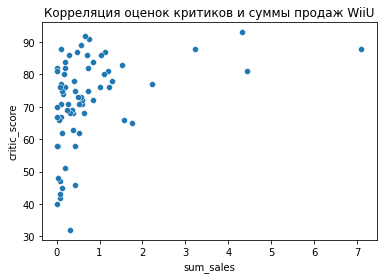

In [38]:
sns.scatterplot(data=data_new.query('platform == "WiiU"'), x='sum_sales', y='critic_score').set_title('Корреляция оценок критиков и суммы продаж WiiU');
data_new.query('platform == "WiiU"')['sum_sales'].corr(data_new.query('platform == "WiiU"')['critic_score']) # посмотрим на коэффициент корреляции Пирсона

0.4193304819266187

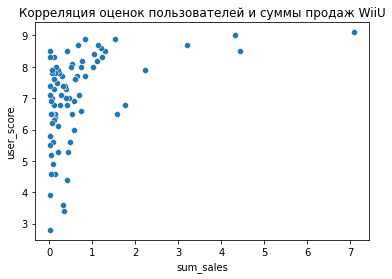

In [39]:
sns.scatterplot(data=data_new.query('platform == "WiiU"'), x='sum_sales', y='user_score').set_title('Корреляция оценок пользователей и суммы продаж WiiU');
data_new.query('platform == "WiiU"')['sum_sales'].corr(data_new.query('platform == "WiiU"')['user_score']) # посмотрим на коэффициент корреляции Пирсона

А вот в Японии оценки юзеров имеют бОльшее значение, чем оценки критиков и почти заслуживают доверия. Но корреляция все равно очень слабая.

Теперь возьмем для сравнения какую-нибудь непопулярную платформу из прошлого и посмотрим, есть ли корреляция с оценками критиков или пользователей.

0.38425219859841503

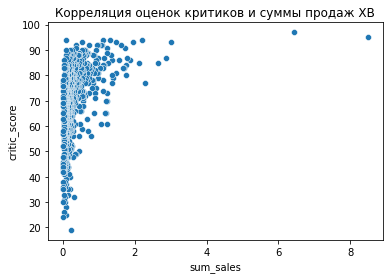

In [40]:
sns.scatterplot(data=data.query('platform == "XB"'), x='sum_sales', y='critic_score').set_title('Корреляция оценок критиков и суммы продаж XB');
data.query('platform == "XB"')['sum_sales'].corr(data.query('platform == "XB"')['critic_score']) # посмотрим на коэффициент корреляции Пирсона

0.1748761718532454

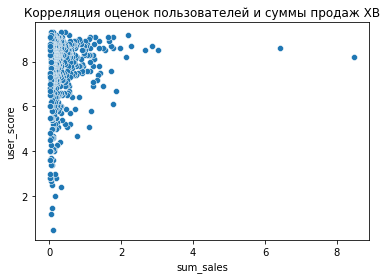

In [41]:
sns.scatterplot(data=data.query('platform == "XB"'), x='sum_sales', y='user_score').set_title('Корреляция оценок пользователей и суммы продаж XB');
data.query('platform == "XB"')['sum_sales'].corr(data.query('platform == "XB"')['user_score']) # посмотрим на коэффициент корреляции Пирсона

Корреляция примерно того же уровня - совсем маленькая с оценками пользователей, и более ощутимая - с оценками критиков.

Получается оценки критиков можно использовать как критерий при выборе игр для нашего магазина. 

### Исследование жанров

Посмотрим, какие жанры пользуются наибольшей популярностью.

In [42]:
data_genre = data_new.groupby('genre')['sum_sales'].sum().sort_values(ascending=False) # сгруппируем жанры по числу продаж
data_genre

genre
Action          321.37
Shooter         232.98
Sports          150.62
Role-Playing    145.89
Misc             62.74
Platform         41.94
Racing           39.89
Fighting         35.31
Adventure        23.61
Simulation       21.55
Strategy         10.08
Puzzle            3.17
Name: sum_sales, dtype: float64

Возьмем из них топ-7 и нанесем жанры на диаграмму-пирог.

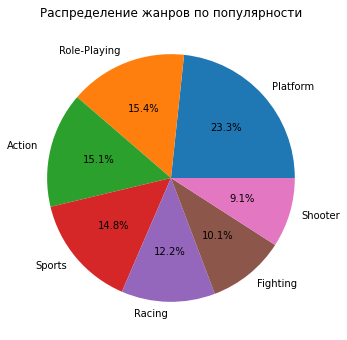

In [57]:
data_genre = data_genre.head(7)
data_genre.plot(kind='pie', y = 'sum_sales', figsize=(5,5), autopct='%1.1f%%')
plt.tight_layout()
plt.title('Распределение жанров по популярности')
plt.ylabel('');

БОльшую часть рынка покрыли 5 жанров: шутеры, экшен, РПГ, спортивные (под спортивными с большой вероятностию подразумевается Fifa, но это можно проверить) и аркады. Все остальные игры сильно уступают по продажам, но и у них есть своя аудитория.

Интересно посмотреть, какие жанры пользовались популярностью в прошлом, измелилось ли что-то за 30 лет развития игровой индустрии? 

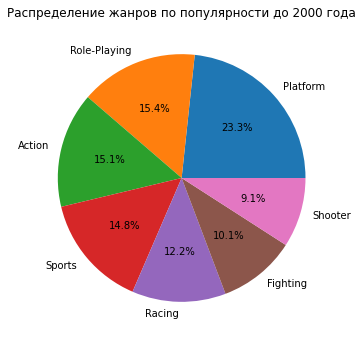

In [58]:
data_genre = data.query('year_of_release <2001').groupby('genre')['sum_sales'].sum().sort_values(ascending=False) # сгруппируем жанры по числу продаж
data_genre
data_genre = data_genre.head(7)
data_genre.plot(kind='pie', y = 'sum_sales', figsize=(5,5), autopct='%1.1f%%')
plt.tight_layout()
plt.title('Распределение жанров по популярности до 2000 года')
plt.ylabel('');

в 80-е и 90-е люди в основном играли в платформенные игры типа Super Mario и Princ of Persia. Были популярны так же РПГ, экшены, спортивные игры и гонки.

Теперь посмотрим будут ли такие же значения, если взять не суммарные, а средние и медианные значения.

In [45]:
data_genre_mean = (data_new.pivot_table(index='genre', values='sum_sales', aggfunc='mean')
                  .sort_values(by='sum_sales',ascending=False)
                  .head(7))
data_genre_median = (data_new.pivot_table(index='genre', values='sum_sales', aggfunc='median')
                  .sort_values(by='sum_sales',ascending=False)
                  .head(7))
display(data_genre_mean)
data_genre_median

,sum_sales
genre,
Shooter,1.245882
Sports,0.707136
Platform,0.582500
Role-Playing,0.499623
Racing,0.469294
Fighting,0.441375
Action,0.420641


,sum_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110


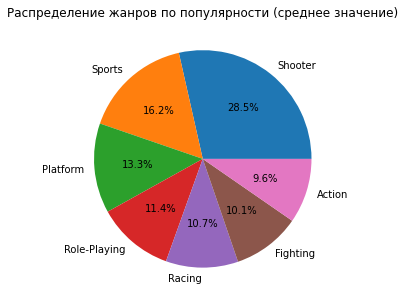

In [46]:
ax = data_genre_mean.plot(kind='pie', y = 'sum_sales', figsize=(5,5), autopct='%1.1f%%', legend = False)
ax.set_ylabel('')
plt.title('Распределение жанров по популярности (среднее значение)');

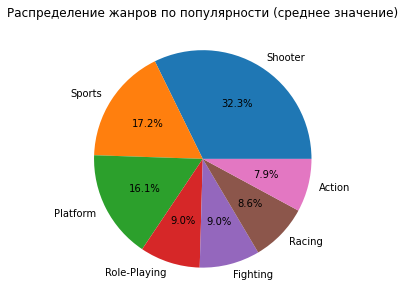

In [47]:
ax = data_genre_median.plot(kind='pie', y = 'sum_sales', figsize=(5,5), autopct='%1.1f%%', legend = False)
ax.set_ylabel('')
plt.title('Распределение жанров по популярности (среднее значение)');

Получается что если посмотреть на среднее и медиану - шутеры выходят на первое место, а экшены если смотреть с этой стороны - составляют меньше 10%.  

Значит предположение было верным - экшены выходят на первое место из-за продажи бесцеллеров, но средний покупательо больше любит шутеры и спортивные игры.

[Содержание](#0)

## Портреты пользователей из разных регионов
<a id=4> </a>

В нашем дата-сете собраны данные о пользователях из разных стран - составим на основе этих данных характерный портрет пользователя для каждого региона.

### Продажи

Посмотрим на продажи в Северной Америке.

In [59]:
data_platform_NA = data_new.groupby('platform')['na_sales'].sum()
data_platform_NA = data_platform_NA.sort_values(ascending=False).reset_index()
top_5_NA = data_platform_NA['platform'].head(5) # top-5 для Северной Америки
data_platform_EU = data_new.groupby('platform')['eu_sales'].sum()
data_platform_EU = data_platform_EU.sort_values(ascending=False).reset_index()
top_5_EU = data_platform_EU['platform'].head(5) # top-5 для Европы
data_platform_JP =data_new.groupby('platform')['jp_sales'].sum()
data_platform_JP = data_platform_JP.sort_values(ascending=False).reset_index()
top_5_JP = data_platform_JP['platform'].head(5) # top-5 для Японии
print('top-5 для Северной Америки:')
print(top_5_NA)
print('top-5 для Европы:')
print(top_5_EU)
print('top-5 Японии:')
print(top_5_JP)

top-5 для Северной Америки:
0     PS4
1    XOne
2    X360
3     PS3
4     3DS
Name: platform, dtype: object
top-5 для Европы:
0     PS4
1     PS3
2    XOne
3    X360
4     3DS
Name: platform, dtype: object
top-5 Японии:
0     3DS
1     PS3
2     PSV
3     PS4
4    WiiU
Name: platform, dtype: object


Список популярных платформ - очень похожий на тот, что мы поличили по общим продажам, но есть региональные особенности:
1. В Европе и Северной Америке первое место занимает PS4, а в Японии она лишь на 3 месте по популярности.
0. В Европе и Америке одинаковый топ.
0. В Японии самая популярная консоль - Nintendo (3DS).
0. В Японии в топ3 - портативные приставки 3DS и PSV
0. Wii популярна во всех регионах.
0. В Японии PS3 популярнее PS4.

### Жанры

Теперь посмотрим, какие жанры популярны в разных регионах.

In [60]:
data_top_5_NA = data_new[data_new['platform'].isin(top_5_NA)] # отфильтруем по топ_5 платформ
data_genre_NA = data_top_5_NA.groupby('genre')['na_sales'].sum().sort_values(ascending=False)#  сгруппируем жанры по числу продаж
top_genres_NA = data_genre_NA.head(5).reset_index() # сохраним топ-5 жанров
data_top_5_EU = data_new[data_new['platform'].isin(top_5_EU)]
data_genre_EU = data_top_5_EU.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)# сгруппируем жанры по числу продаж
top_genres_EU = data_genre_EU.head(5).reset_index()
data_top_5_JP = data_new[data_new['platform'].isin(top_5_JP)]
data_genre_JP = data_top_5_JP.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)# сгруппируем жанры по числу продаж
top_genres_JP = data_genre_JP.head(5).reset_index()

Нарисуем 3 диаграммы для трех регионов.

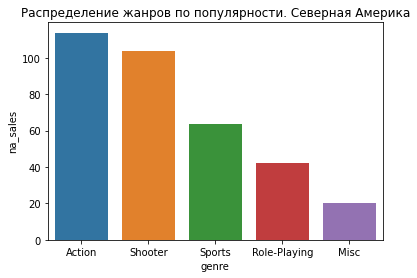

In [61]:
sns.barplot(x = 'genre', y = 'na_sales', data = top_genres_NA)

plt.title('Распределение жанров по популярности. Северная Америка');

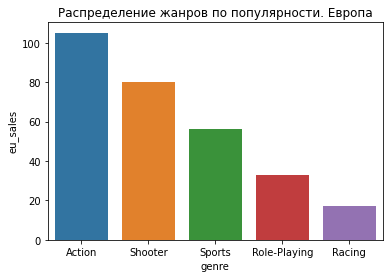

In [62]:
sns.barplot(x = 'genre', y = 'eu_sales', data = top_genres_EU)

plt.title('Распределение жанров по популярности. Европа');

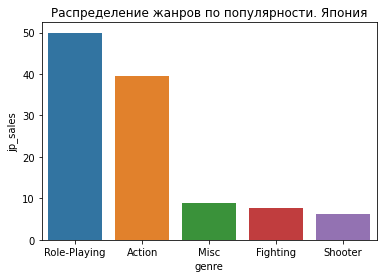

In [63]:
sns.barplot(x = 'genre', y = 'jp_sales', data = top_genres_JP)

plt.title('Распределение жанров по популярности. Япония');

В том что касается жанров юзеры из разных регионов отличаются довольно сильно, но европейцы похожи на жителей Северной Америки, а вот жители Японии отличаются довольно сильно.
1. В Европе и Америке Экшены популярнее всего.
0. В Японии на первом месте РПГ, при чем с большим отрывом.
0. А вот в Японии шутеры не пользуются популярностью, а спортивные симуляторы лишь на 4 месте по популярности.
0. В Японии, видимо в связи с популярностью Nintendo, многие играют в платформенные игры и аркады.


### Рейтинг ESRB

Поскольку рейтинг ESRB актуален только для Северной Америки, а в Европе и Японии действуют свои аналоги этого рейтинга, по хорошему он должен иметь наибольшее влияние в Америке, но проверим так же его влияние в других регионах.

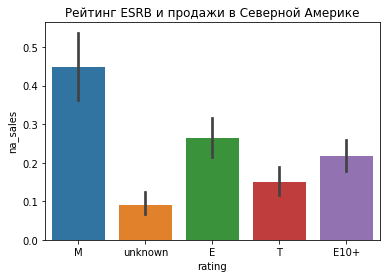

In [64]:
sns.barplot(data=data_new, x='rating', y='na_sales').set_title('Рейтинг ESRB и продажи в Северной Америке');

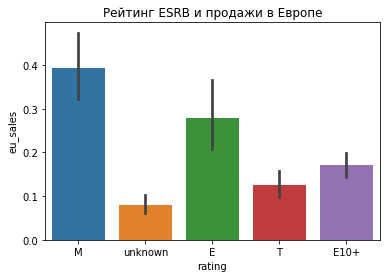

In [65]:
sns.barplot(data=data_new, x='rating', y='eu_sales').set_title('Рейтинг ESRB и продажи в Европе');

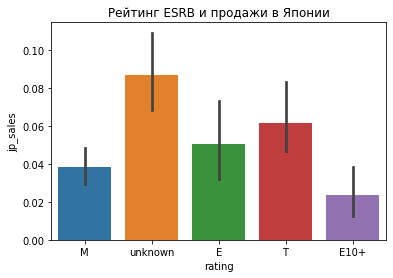

In [66]:
sns.barplot(data=data_new, x='rating', y='jp_sales').set_title('Рейтинг ESRB и продажи в Японии');

Получается, рейтинг имеет значение для Европы и Северной Америки, а на продажи в Японии он влияет намного меньше - большинство значений попало в колонку unknown, значит в Японии покупаются игры в соответствии с каким-то другим критерием, чем рейтинг ESRB.

[Содержание](#0)

## Проверка гипотез
<a id=5> </a>

Сформулируем 2 исследовательские гипотезы и проверим их.

### Гипотеза 1

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Здесь нулевой гипотезой будет - рейтинги пользователей для обеих платформ одинаковые, а альтернативной - рейтинги различаются. Гипотеза двусторонняя. Поскольку у нас нет уверенности, сильно ли отличаются пользователи разных платформ, мы введем дополнительный параметр в t-test.

In [ ]:
alpha = .05 # зададим уровень статистической значимости в 5%
# если p-value окажется меньше него - отвергнем гипотезу
platform1 = data_new.query('platform == "PC"')['user_score'] # сделаем срез по платформе
platform2 = data_new.query('platform == "XOne"')['user_score']
results = st.ttest_ind(
    platform1, platform2, equal_var = False, nan_policy='omit') # не будем обращать внимание на значения NaN  
if (results.pvalue) < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('p-value =', results.pvalue)


Рейтинги различаются, вероятность того что они одинаковые слишком мала, чтобы мы приняли эту гипотезу.

 ### Гипотеза 2

Средние пользовательские рейтинги жанров Action и Sports разные. Здесь нулевой гипотезой будет: рейтинги одинаковые, а альтернативной - рейтинги отличаются.


In [ ]:
alpha = .05 # зададим уровень статистической значимости в 5%
# если p-value окажется меньше него - отвергнем гипотезу
Action = data_new.query('genre == "Action"')['user_score']
Sports = data_new.query('genre == "Sports"')['user_score']
results = st.ttest_ind(
    Action, Sports, equal_var = False, nan_policy='omit')
if (results.pvalue) < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('p-value =', results.pvalue)


Рейтинги игр в жанрах Action и Sports с большим процентом вероятности различаются.

[Содержание](#0)

## Вывод
<a id=6> </a>

Мы рассмотрели выборку данных за 1985-2016 годы. Данные до 2000 года не очень репрезентативные в плане маркетинговой стратегии, но они могомают нарисовать общую картину развития игровой индустрии, и несмотря на развитие интернета и появление новых технологий - люди играют во все тот же набор игр почти в тех же жанрах что и раньше. Хотя их распределение немного изменилось.   
Мы нормализовали данные для игр по разным платформам, чтобы посмотреть динамику их жизни и установили что средний срок жизни 1 платформы 7-10 лет. Исходя из этого мы проанализировали данные за 4 последних года.

На чем же следует сделать акцент при выборе игр для магазина в будущем году? 
1. Пока не вышла новая модель PS, игр для PS4 будет выпускаться больше, а PS3 сойдет на нет.
0. В магазинах в разных странах следует учесть региональные особенности.
0. В Японии будут покупать все от Nintendo.
0. В Америке и Европе возглавляют топ игровых консолей  PlayStation 4 и Xbox.
0. В Японии главной игровой консолью будет 3DS.
0. В Северной Америке и Европе можно испльзовать похожие рекламные кампании, но для Японского рынка придется сделать отдельную.
0. Самыми популярными жанрами в Европе и Северной Америке будут экшены, шутеры и спортивные игры.
0. В Японии следует сделать акцент в первую очередь на РПГ, но Экшены с ними почти на одном уровне.
0. При выборе игр можно учитывать рейтинг критиков, но не рейтинг пользователей - он не коррелирует с реальными продажами игр.
0. Можно смотреть на рейтинг ESRB в Северной Америке и Европе. В Японии есть свой аналог данного рейтинга, в дальнейшем можно добавить их в данные и так же испльзовать. В связи с нашими данными, сегмент игр для взрослых будет занимать бОльшую часть рынка, но о детях и подростках так же не следует забывать. Мы полагаем, эта аудитория будет только расти в будущие годы.

Нашу стратегию можно применить к последующим временным периодам. То же исследование можно будет повторить через год или два, когда появятся новые данные и новые игровые консоли. Есть вероятность что распределение жанров, консолей и возрастных категорий может поменяться, но принципы анализа будут так же актуальны.
